# PREP COURSE CAPSTONE
by: Melissa N 

Data: [Olympic games Data](https://www.kaggle.com/the-guardian/olympic-games/data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statistics
%matplotlib inlineDescribe your dataset.
plt.rcParams['figure.figsize'] = (20.0, 5.0)

### Describe your dataset.

In this project I will be studying 3 datasets which gives us informations about the different athletes who have won Gold, Silver and Bronze medals in the summer and winter olympics. The first data set called dictionary which will be reffered to as df0 during our study contains informations about the countries that have participated in the different Olympics. The information provided in this file are the different countries name, their country code, the population and GDP of the participating countries. The country code of countries that have been dissolved are not found in this file even though they appear in the other two data sets. For example URS which is the country code for the former Soviet Union (USSR) and GDR which is the country code for the German Democratic Republic. Also there is no information about the date or year the GDP and Population of the countries listed in the file refer to. For now I am assuming it is from 2016 since according to Kaggle, the file was updated a year ago. 

In [45]:
df0 = pd.read_csv('dictionary.csv')
df0.head() #Not using Print statement so that it displays all in one line for all tables 

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


The second data set called summer which will be reffered to as df1 in our study contains information about the summer olympic games. We are given information about the year and the city each summer olympic took place. Next we are given information about the sport, discipline, name of athelete and their country of origin (in this file it is the country code provided in the dictionnary data set). And lastly, we are provided the gender, event and medal won by say athlete. 
One important thing to note is that, the sport and the discipline are not always reffering to the same thing. For instance, if we look at the sport of Aquatics it encompasses multiple disciplines like Diving, Swimming, Marathon Swimming, Synchronized Swimming and Water Polo. While for sports like Archery, Football (Soccer), Golf, Tennis, Baseball, Judo and Weighlifting just to name a few, their sport and discipline names are the same. According to the data in this file, the first summer olympic games were held in Athens in 1896 and the last ones were held in 2012 in London.  

In [92]:
df1 = pd.read_csv('summer.csv')  
df1.head() 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [93]:
df1.tail() 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


The third and final data set is called winter and reffered to as df2 in our Python file. This data set contains information about the winter olympics and similarly to the data set summer, we are given information about the athletes who have won the different medals on the particular year and city the winter Olympic games took place. Now for the winter olympics, only a few of the Sport have the same Discipline names and they are: Biathlon, Bobsleigh, Curling, Ice Hockey and Luge. One interesting fact about Ice Hockey is that it is a Sport that actually first appeared in the 1920 summer olympic games held at Antwerp and was then moved to the winter olympics games of 1924 and have been a winter olympic sport since then. Accordding to this data set, the first winter olympic games were held in 1924 in Chamonix and the last ones were held in 2014 in Sochi. Just as in the summer data set, we are not provided with the name of the country (country code) were the olympic games took place, we are only given the name of the hosting city.  

In [94]:
df2 = pd.read_csv('winter.csv')
df2.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [95]:
df2.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
5769,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


Now, we are going to be looking through the medal counts for the different countries in the summer and olympic games.
Medal count is one of the variable I look out
===> Need to include why I am doing this???????

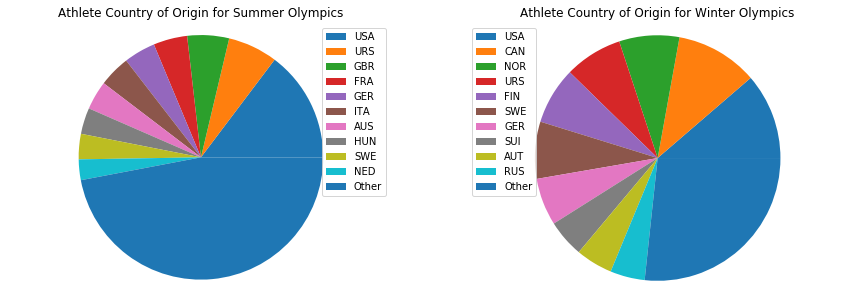

In [96]:
# Process data to create medal counts by country for the Summer Olympics
locations = df1.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_1 = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_1[10:].sum())
cntry_counts_1 = cntry_counts_1[:10]
cntry_counts_1.loc[11] = other
cntry_counts_1 = cntry_counts_1.rename(index={11: 'Other'})


# Process data to create medal counts by country for  Winter Olympics
locations = df2.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_2 = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_2[10:].sum())
cntry_counts_2 = cntry_counts_2[:10]
cntry_counts_2.loc[11] = other
cntry_counts_2 = cntry_counts_2.rename(index={11: 'Other'})

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.pie(cntry_counts_1.Country)
plt.axis('equal')
plt.title('Athlete Country of Origin for Summer Olympics')
plt.legend(cntry_counts_1.index)

plt.subplot(1, 2, 2)
plt.pie(cntry_counts_2.Country)
plt.axis('equal')
plt.title('Athlete Country of Origin for Winter Olympics')
plt.legend(cntry_counts_2.index)

plt.show()

The Top 5 countries with the most medals  for the summer olympics are USA (United States), URS (USSR), GBR (United Kingdom), FRA (France) and GER (Germany). For the winter Olympics the Top 5 countries are USA (United States), CAN (Canada), NOR (Norway), URS (USSR) and FIN (Finland). According to the data provided by df1 and df2, we can see clearly that the United States is the country with the most olympics medals. Another country with a good amount of summer and winter olympic medals or dominating the olympics is the country with country code URS (which has no reference in the file df0). Looking at this 2 data sets, it will be intereting to see the trends of the differents disciplines for the winter and summer olympic games.  

NOTE: Because the Blue of USA and the Blue of Other in our pie charts are so similar, please pay attention to the small line of demarcation between the two colors which helps differentiate them. 
 

## Summer Olympic Games 
Trying to figure out the trends of the different disciplines, I first look at the at the Top 20 Disciplines with the most medals for the summer olympics. This will help me to identify the disciplines I could potentially study later on. 

In the code below I have plot showing the Top 20 Disciplines with the most medals in the summer olympics. 

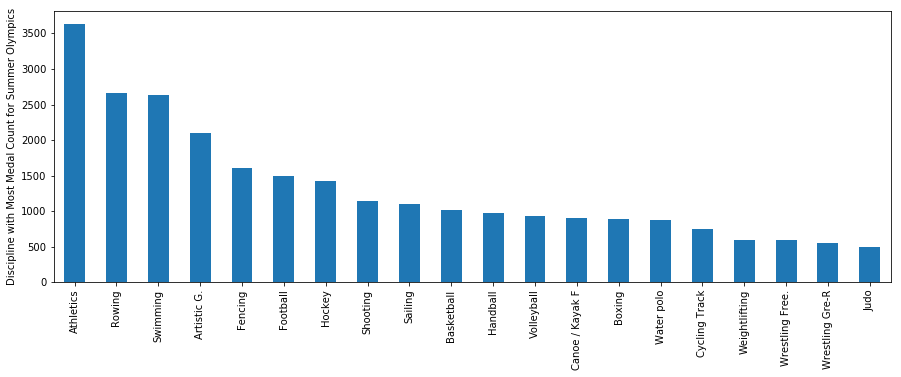

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
#Summer Olympic Discipline with the Most Medals Top 20
df1.Discipline.value_counts().head(20).plot(kind='bar')
plt.ylabel('Discipline with Most Medal Count for Summer Olympics')

plt.show()

For the Top 20 Disciplines, I will looking at the trends of Athletics, Swimming, Basketball and Football (Soccer in the USA) over time. 
I chose Athletics because it a Discipline that has some of the most popular Events like the 100M, 400M, 4X100M Relay and the 4X400M Relay that have been dominated by the USA, Jamaica and GBR when you talk about Short distance Running and countries like Kenya, Ethiopia when you look at the long distane Running.  
I chose Swimming because Michael Phelps and many other United States Olympians have made the discipline very popular in the USA and around the world. 
I chose Basketball because it has some of the most high profile athletes participating with interesting teams with specific storylines like the "Dream Team" of the 1992 Olympics led by Michael Jordan and the "Redeem Team" of Kobe Bryant during the 2008 Olympics.
Lastly, I chose Football because it is the most popular game in the world played by many around the world but strangely doesn't have that big of a Olympic following.

Next we will be looking at how the Medal counts for those disciplines vary over time. 

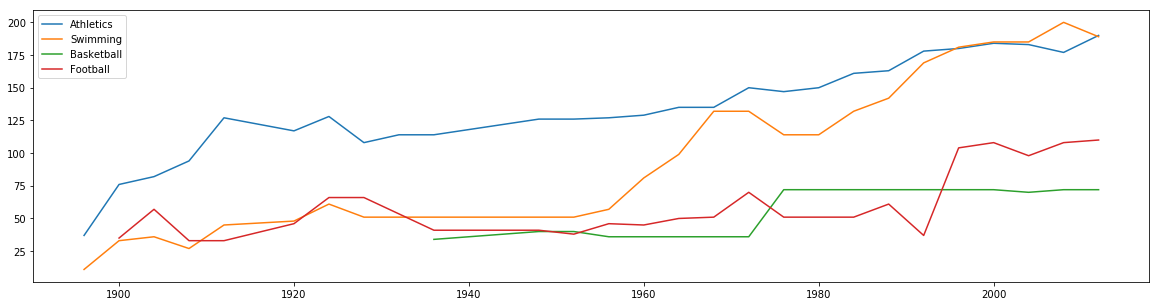

In [56]:
## To figure out trend of a Discipline in Summer Olympics

Athletics = df1[df1['Discipline']=='Athletics']
Swimming = df1[df1['Discipline']=='Swimming']
Basketball = df1[df1['Discipline']=='Basketball']
Football = df1[df1['Discipline']=='Football']

plt.plot(Athletics.Year.value_counts().sort_index(), label="Athletics")
plt.plot(Swimming.Year.value_counts().sort_index(), label="Swimming")
plt.plot(Basketball.Year.value_counts().sort_index(), label="Basketball")
plt.plot(Football.Year.value_counts().sort_index(), label="Football")
plt.legend()


According to the data df1, the Discipline of Athletics was introduced at the Helinski 1952 summer olympic games with men and women competing in multiple events over the years. 

According to the data df1, the Discipline of Swimming was introduced at the Athens 1896 summer olympic games with men being the only competing in the following events: "100M Freestyle," "100M Freestyle For Sailors," "1200M Freestyle" and the "400M Freestyle." The following summer olympics, more events were introduced like "200M Obstacle Event," "200M Team Swimming" (5 members per team) and "Underwater Swimming". The big step change in the graph occurs when women were allowed to compete at the 1912 Stockholm Olympics. 


According to the data df1, Basketball was introduced at the Berlin 1936 summer olympic games with men being the only competitors. The Teams seem to not have a set number of members, that year the USA who won gold had 14 members, Canada who won Silver had 9 members while Mexico who won Bronxe had 11 members. This mismatch continued until 1956 were it seems that all of the teams had 12 members. The step change in the graph occurs because women started playing Basketball in the summer olympics of 1976 in Montreal similarly to the men with a 12 members team. 


According to the data df1, Football was introduced at the Paris 1900 summer olympic games with men being the only competitors. The Teams seem to not have a set number of members, that year the United Kingdom  and Belgium who won gold and Bronze respectively had 11 members each while France who won Silver had a team with 13 members. In 1904 USA got Bronze with Bronze was won by a 13 member USA team, Silver by a 11 members USA team while Gold was given to a team consisting of 17 members from the US and  7 from Canada. This is the only time something like this happened. At the 1924 the teams of each countries had each 22 members. In the summer olympics of 1936 this number was reduced to 14 members per team. Regardless the members per team isn't consistent over the years but one thing to note is that the big step change in the graph occurs because women started playing Football in the summer olympics of 1996 in Atlanta.

## Winter Olympic Games
Once again, to help me with figuring out what Disciplines to study for the winter olympics, I looked at the Disciplines that were not dominated by the United States and Canada. 

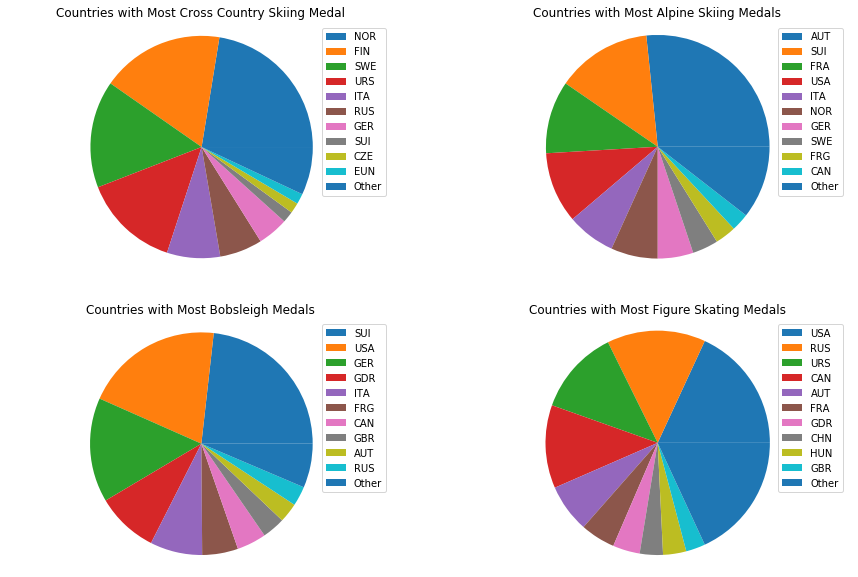

In [88]:
# Process data to create medal counts by country for the Cross Country Skiing 
locations = CC_Skiing.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_cc = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_cc[10:].sum())
cntry_counts_cc = cntry_counts_cc[:10]
cntry_counts_cc.loc[11] = other
cntry_counts_cc = cntry_counts_cc.rename(index={11: 'Other'})


# Process data to create medal counts by country for  Alpine Skiing
locations = AlpineSkiing.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_as = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_as[10:].sum())
cntry_counts_as = cntry_counts_as[:10]
cntry_counts_as.loc[11] = other
cntry_counts_as = cntry_counts_as.rename(index={11: 'Other'})

# Process data to create medal counts by country for the Bobsleigh 
locations = Bobsleigh.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_bs = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_bs[10:].sum())
cntry_counts_bs = cntry_counts_bs[:10]
cntry_counts_bs.loc[11] = other
cntry_counts_bs = cntry_counts_bs.rename(index={11: 'Other'})


# Process data to create medal counts by country for Figure Skating
locations = FigureSkating.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_fs = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_fs[10:].sum())
cntry_counts_fs = cntry_counts_fs[:10]
cntry_counts_fs.loc[11] = other
cntry_counts_fs = cntry_counts_fs.rename(index={11: 'Other'})

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.pie(cntry_counts_cc.Country)
plt.axis('equal')
plt.title('Countries with Most Cross Country Skiing Medal')
plt.legend(cntry_counts_cc.index)

plt.subplot(2, 2, 2)
plt.pie(cntry_counts_as.Country)
plt.axis('equal')
plt.title('Countries with Most Alpine Skiing Medals')
plt.legend(cntry_counts_as.index)

plt.subplot(2, 2, 3)
plt.pie(cntry_counts_bs.Country)
plt.axis('equal')
plt.title('Countries with Most Bobsleigh Medals')
plt.legend(cntry_counts_bs.index)

plt.subplot(2, 2, 4)
plt.pie(cntry_counts_fs.Country)
plt.axis('equal')
plt.title('Countries with Most Figure Skating Medals')
plt.legend(cntry_counts_fs.index)

plt.show()

One thing to note, is that the winter unlike the summer olympics only have only 20 Disciplines the athletes compete in every olympics. For the winter olympics, I will be studying the trends of Cross Country Skiing, Alpine Skiing Bobsleigh and Figure Skating. While for the summer olympics, most of the popular disciplines were dominated by the United States, it was interesting to see a different trend for the popular winter olympic Disciplines. 
I chose Cross Country Skiing because this is actually one of the few winter games that is not dominated by the USA and Canada, the country with the most olympics medals is Norway with 177, followed by Finland with 141 and Sweden with 123 total olympic Medals. 
As for Alpine Sking this sport is dominated by Austria with 114 total Medals, followed by Switzerland with 59 and France with 45 total Medals each. 
Bobsleigh is dominated by Switzerland with 98 Medals to the United Sates 85 and Germany 65. 
And last but not least I chose Figure Skating because while it is one of the few winter Olympic sport that is pretty popular around the world it was interesting to see that while the United States came first with 65 total Medals, they were followed closely with Russia with 51 Medals, the now defunct USSR with 44 Medals and Canada with 43 Medals.  

Next we will be looking at how the Medal counts for those disciplines vary over time for the winter olympics.

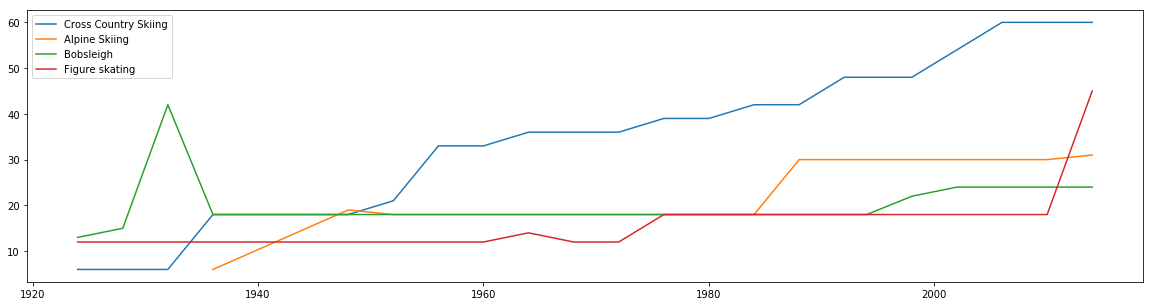

In [85]:
## To figure out trend of a Discipline in Winter Olympics
CC_Skiing = df2[df2['Discipline']=='Cross Country Skiing']
AlpineSkiing = df2[df2['Discipline']=='Alpine Skiing']
Bobsleigh = df2[df2['Discipline']=='Bobsleigh']
FigureSkating = df2[df2['Discipline']=='Figure skating']


plt.plot(CC_Skiing.Year.value_counts().sort_index(), label="Cross Country Skiing")
plt.plot(AlpineSkiing.Year.value_counts().sort_index(), label="Alpine Skiing")
plt.plot(Bobsleigh.Year.value_counts().sort_index(), label="Bobsleigh")
plt.plot(FigureSkating.Year.value_counts().sort_index(), label="Figure skating")
plt.legend()


According to the data df2, Cross Country Sking was first introduced in the Chamonix Olympics of 1924 with men competing in the "18KM" and "50KM" Events. At the 1936 Olympics of Garmisch Partenkirchen the "4X10KM Relay" was introduced which caused the step increase we see around the 1940 in our curve. At the 1952 Olympics in Oslo, we see another increase in our curve because women were allowed to compete in the "10KM" Event and from that point on, each new Olympic games women and men were able to compete in some additional Events. For instance the "3X5KM Relay" Event was introduced for women in the 1956 winter olympics and the "30KM Mass Start" was added as an Event the men could compete in. 

According to the data df2, Alpine Skiing was first introduced in the 1936 Olympics of Garmisch Partenkirchen with men and women competing in the "Alpine Combined" Event. The step increase in curve comes from the fact that from the data we see that at the following winter olympics, more events were introduced in which men and women could compete in. They are the "Downhill" and "Slalom" Events. At the following winter olympics the "Alpine Combined" Event was removed and the "Giant Slalom" Event was added. In the Calgary 1988 winter olympics "Alpine Combined" was reintroduced as an Event with the addition of the "Super-G" Event.    
 
According to the data df2, Bobsleigh was first introduced in the Chamonix Olympics of 1924 with 5 men team members competing in the "Four-Man" Event. For the winter Olympics of 1932 my interpretation is that the "Four-Man" Event went from a  teamm with 5 members to one with 11 members.
For that same olympics for the "Two-Man" Event, according to the data they  were 2 Gold winners (USA), 6 Bronze winners (USA) and 8 Silver (SUI). This is something that needs to be investigated further.
 
According to the data df2, Figure Skating was first introduced in the the Chamonix Olympics of 1924 with men and women competing in the "Individual" and "Pairs" Event. In the 1976 winter olympics, the "Ice Dancing" Event was introduced 
and at the 2014 winter olympics, the "Team" Event was added to the line up for men and women competitors.  

## Women in the Summer Olympics 

In [74]:
#Men in the  Summer Olympics 
df1M = df1[df1['Gender']== 'Men']
#Women in the  Summer Olympics 

df1W = df1[df1['Gender']== 'Women']
df1W.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze


In [75]:
df1W.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31116,2012,London,Wrestling,Wrestling Freestyle,"VOLOSOVA, Lubov",RUS,Women,Wf 63 KG,Bronze
31121,2012,London,Wrestling,Wrestling Freestyle,"VOROBIEVA, Natalia",RUS,Women,Wf 72 KG,Gold
31122,2012,London,Wrestling,Wrestling Freestyle,"HRISTOVA, Stanka Zlateva",BUL,Women,Wf 72 KG,Silver
31123,2012,London,Wrestling,Wrestling Freestyle,"MANYUROVA, Guzel",KAZ,Women,Wf 72 KG,Bronze
31124,2012,London,Wrestling,Wrestling Freestyle,"UNDA, Maider",ESP,Women,Wf 72 KG,Bronze


It looks like in the summer olympics, the women were allowed to compete by the 1900 summer olympics in Paris and they have been competing ever since. The two disciplines they were allowed to compete in during those Summer Olympics are Golf and Tennis. One thing to note is that while it looks like women were not part of the first summer olympics, it took a long time for them to be allowed to participate in all of the disciplines their male counterpart were competing in.  
To figure out the Disciplines whose trends I would like to study, as I did previously for the summmer and winter olympics. I am going to list the disciplines with the most and least medal counts to see if I found something interesting. 

Next we are looking at the medal counts for the Disciplines the women competed in over time. 

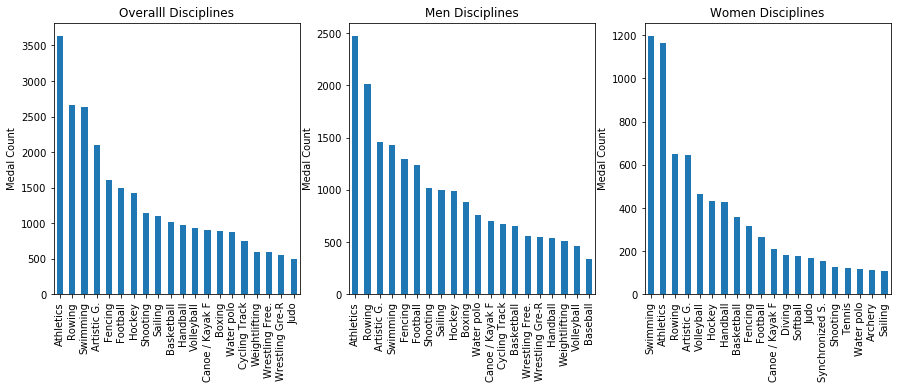

In [81]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
#Summer Olympic Discipline with the Most Medals Top 20
df1.Discipline.value_counts().head(20).plot(kind='bar')
plt.ylabel('Medal Count')
plt.title('Overalll Disciplines')

plt.subplot(1, 3, 2)
df1M.Discipline.value_counts().head(20).plot(kind='bar')
plt.ylabel('Medal Count')
plt.title('Men Disciplines')

plt.subplot(1, 3, 3)
#Summer Olympic Discipline with the Least Medals Last 20
df1W.Discipline.value_counts().head(20).plot(kind='bar')
plt.ylabel('Medal Count')
plt.title('Women Disciplines')

plt.show()

When you only look at the women disciplines in the summer olympics it is interesting to note that the disciplines where they have the most medals does not exactly match the ones with the data where both genders are included. 
The Disciplines that are in the overall Top 20 Medal counts and not in the Women Top 20 Medal counts are: Boxing, Cycling Track, Weightlifting, Wrestling Free and Wrestling Gre-R. While Wrestling Free and Wrestling Gre-R are Disciplines that are men only disciplines, for the others, women were only allowed to compete in it Centuries after they were first introduced. For instance, for Weightlifting men were competing in it since 1896 while women could only do so by the 2000 summer Olympic. 

For the Men Top 20 Disciplines the only way it differs from the Overall Top 20 is that Judo is in the Overall Top 20 Medal counts and it is replaced by Baseball in the Men Top 20 Disciplines Medal counts. 

As far as the disciplines that are the Women top 20 and not in the overall, they are Diving, Softball, Tennis and Archery. While Softball is a women only sport, the others were sport were the women were allowed to compete in by the next summer olympics. For instance, the Discipline of Archery it was introduced in the 1900 summer olympic and women started to compete in this discipline in the 1904 summer olympics. 

Knowing all of this, I am going to choose to look at the trend for Swimming and Athletics because they are some of the most popular sport and Artistic G because the world of women gymnastics is one of the most popular in the olympics because it is drama filled with rivalry between teams from different countries. 

The Trends of the Discipline the women competed in 

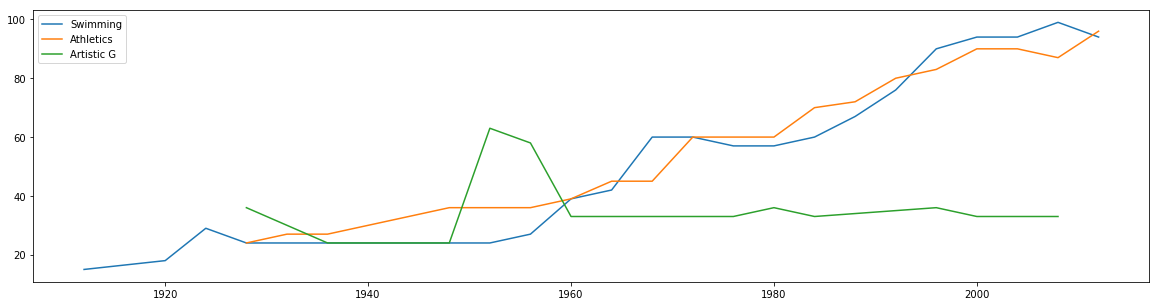

In [98]:
## To figure out trend of a Discipline for Women in Summer Olympics


Swimming_w = df1W[df1W['Discipline']=='Swimming']
Athletics_w = df1W[df1W['Discipline']=='Athletics']
ArtisticG_w = df1W[df1W['Discipline']=='Artistic G.']

plt.plot(Swimming_w.Year.value_counts().sort_index(), label="Swimming")
plt.plot(Athletics_w.Year.value_counts().sort_index(), label="Athletics")
plt.plot(ArtisticG_w.Year.value_counts().sort_index(), label="Artistic G")
plt.legend()

As stated previously, from our data we find out that women were only able to compete in the Discipline of swimming by the 1912 summer olympics. They only participated in 2 events: the "100M Freestyle" and the "4X100M Freestyle Relay". And each subsequent olympic games a new event was added: the"400M Freestyle" in 1920, the "200M Breaststroke" in 1924  and the "400M Freestyle" in the 1928 summer olympics. After a period of women athlete competing only 5 Events, in 1956 the "100M Butterfly" Event was added and from there more and more events get added. For the last summer olympics of 2012 there were a total of 16 Events in which female athletes competed. 


According to our Data, for the Discipline of Athletics female athletes were able to compete in 4 Events in 1928 when the discipline was first introduced. Those events were the "100M", "4X100M Relay", "800M", "Discus Throw" and "High Jump". At the next summer olympic games the "800M" was replaced by the "800M Hurdles" and the "Javelin Throw" was added. From the 1948 summer olympic games, more event were added and now women athletes do compete in a maximum of 23 Events at the summer olympics. 


According to our data, women started to compete in the Artistic G. Discipline at the Amsterdam 1928 summer olympics games. A discipline men have been competing in since the very first olympics in Athens in 1896. They were only allowed to compete in the "Team Competition" Event (12 members per team). The team members per team was reduced to 8 by the next summer olympic games. By the 1952 summer olympics, from the data we can see that women are able to compete in more Events like the "Balance Beam," "Floor Exercises", "Individual All-Round", "Uneven Bars", "Vault" and the added
"Team, Portable Apparatus" that was also an 6 members per team. the 1956 Summer Olympics, was the last time the "Team, Portable Apparatus" appeared in the olympics while the "Team Competition" Event was reduced to 6 members per Team and has been the same ever since. Except for the 1996 summer Olympics in Atlanta where the American (Gold Medal Winner) and  Russian (Silver Medal Winner) Teams consisted of 7 members the Romanians (Bronze Medal Winner) only had 6 members. Looking at the data there seems to have been some athletes scoring the same in the Moscow 1980 summer olympics. For the "Floor Exercises" Event there was 2 Bronze, 2 Gold and no Silver. For the "Individual All-Round" Event there was 1 Gold, 2 Silver and no Bronze. And Finally for the "Uneven Bars" Event, there was 1 Gold, 1 Silver and 3 Bronze Medals awarded. 

## African and Carribean Countries in the Summer Olympics
African and Carribean countries are countries that dominate in some of the most popular disciplines in the Olympics, but because their medal counts is not as high it may not be easy to see how they have been faring in the games.

Since Carribean and African Countries have only be allowed to participate in the olympics after 1948 in the case of Jamaica and 1964 in the case of African countries, except South Africa that has been copeting since 1896. I will be focusing on the Disciplines of Athletics and the medal count per country after 1948 and removing the Top 3 countries.
For Football, I will be looking at how African Teams have been doing since 1990 making sure to remove the Top 4 countries and countries that no longer exist.  

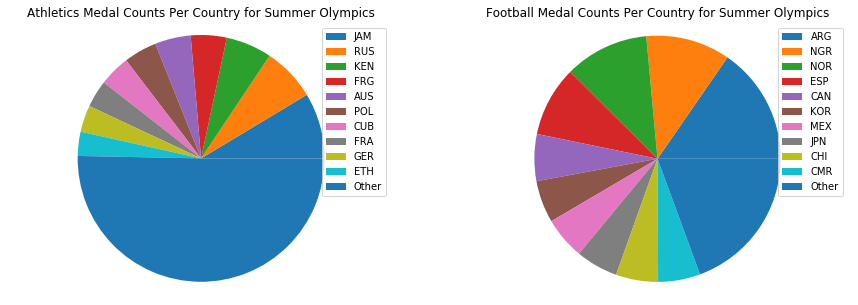

In [90]:
Athletics = Athletics.loc[lambda Athletics: Athletics['Year'] > 1948, :]
Football = Football.loc[lambda Football: Football['Year'] > 1990, :]

Athletics_1 = pd.DataFrame(Athletics[Athletics.Country != 'USA'])
Athletics_2 = pd.DataFrame(Athletics_1[Athletics_1.Country != 'GBR'])
Athletics_3 = pd.DataFrame(Athletics_2[Athletics_2.Country != 'URS'])
Athletics_4 = pd.DataFrame(Athletics_3[Athletics_3.Country != 'GDR'])

Football_1 = pd.DataFrame(Football[Football.Country != 'USA'])
Football_2 = pd.DataFrame(Football_1[Football_1.Country != 'BRA'])
Football_3 = pd.DataFrame(Football_2[Football_2.Country != 'URS'])
Football_4 = pd.DataFrame(Football_3[Football_3.Country != 'GER'])
Football_5 = pd.DataFrame(Football_4[Football_4.Country != 'GDR'])
Football_6 = pd.DataFrame(Football_5[Football_5.Country != 'POL'])

# Process data to create medal counts by country for Athletics 
locations = Athletics_4.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_a = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_a[10:].sum())
cntry_counts_a = cntry_counts_a[:10]
cntry_counts_a.loc[11] = other
cntry_counts_a = cntry_counts_a.rename(index={11: 'Other'})


# Process data to create medal counts by country for Football 
locations = Football_6.Country.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['Country'])
cntry_counts_f = pd.DataFrame(countries.Country.value_counts())
other = int(cntry_counts_f[10:].sum())
cntry_counts_f = cntry_counts_f[:10]
cntry_counts_f.loc[11] = other
cntry_counts_f = cntry_counts_f.rename(index={11: 'Other'})

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.pie(cntry_counts_a.Country)
plt.axis('equal')
plt.title('Athletics Medal Counts Per Country for Summer Olympics')
plt.legend(cntry_counts_a.index)

plt.subplot(1, 2, 2)
plt.pie(cntry_counts_f.Country)
plt.axis('equal')
plt.title('Football Medal Counts Per Country for Summer Olympics')
plt.legend(cntry_counts_f.index)

plt.show()


Looking at this it will be interesting to look at the trends of those countries over time.  
I chose Kenya and Ethiopia because they dominate the Discipline of Athletics when you look at events like the 3000M Steeplechase where Kenya have a total of 20 medals and the 800M that they have dominated since they competed in the summer Olympics in 1964. But when I look at events like 10000M Ethiopia has a total of 21 Medals and the 5000M they have 18 Medals. But for Marathon the two countries are pretty much neck and neck with Kenya leading with 10 medals followed closely by Ethiopia with 9 totals.            

I am choosing Cameroon and Nigeria because they are two of the african countries who have made football popular in Africa and around the world because of the great perfomance of Cameroon in the World Cup of 1990 and the great rivalry between Nigeria and Cameroon when it comes to soccer. 

Lastly since Hussain Bolt has dominated the short distance running in the Olympics and Jamaica is the only Carribean country that appeared in the Atlethics Medal counts. I will be analyzing it together with the African Countries.  

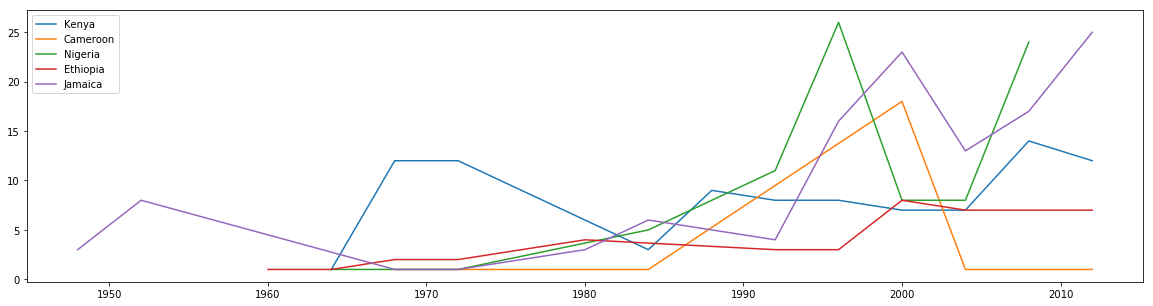

In [91]:
#Figure out Trends For African and Carribean Countries in the Olympics 


Kenya = df1[df1['Country']=='KEN']
Cameroon = df1[df1['Country']=='CMR']
Nigeria = df1[df1['Country']=='NGR']
Ethiopia = df1[df1['Country']=='ETH']
Jamaica = df1[df1['Country']=='JAM']

plt.plot(Kenya.Year.value_counts().sort_index(), label="Kenya")
plt.plot(Cameroon.Year.value_counts().sort_index(), label="Cameroon")
plt.plot(Nigeria.Year.value_counts().sort_index(), label="Nigeria")
plt.plot(Ethiopia.Year.value_counts().sort_index(), label="Ethiopia")
plt.plot(Jamaica.Year.value_counts().sort_index(), label="Jamaica")
plt.legend()


According to our data, Kenya has been winning medals at the olympics since the 1964 Tokyo summer olympic games. They have a total of 93 medals in the Discipline of Athletics (86) and Boxing (7).

According to our data, Jamaica has been winning medals at the olympics since the 1948 London summer olympic games. They have a total of 127 medals in the Discipline of Athletics (126) and Cycling Track (1).

According to our data, Ethiopia has been winning medals at the olympics since the 1960 Rome summer olympic games. They have a total of 45 medals in the Discipline of Athletics.

According to our data, Cameroon has been winning medals at the olympics since the 1968 Mexico summer olympic games. They have a total of 23 medals in the Discipline of Athletics (2), Boxing (2), Football (18) and weightlifting (1).

According to our data, Nigeria has been winning medals at the olympics since the 1968 Mexico summer olympic games. They have a total of 54 medals in the Discipline of Athletics (40), Boxing (6), Football (36), Taekwondo (1) and weightlifting (1).

One thing that we have to note here is that Nigeria and Cameroon numbers are a little high because they have both won in Football and thus have 18 Team members who have received a Medal, once in the case of Cameroon and twice when it comes to Nigeria. 

Of the 4 countries selected, Ethiopia and Cameroon are the only one that do not have a medal in the Discipline of Athletics Team Event, Jamaica, Nigeria and Kenya have them. For  the "4X400M Relay" Event Kenya has 8, Nigeria 18 and Jamaica 40. And for the "4X100M Relay" Nigeria has 17 and Jamaica 35. 

### Ask and answer analytic questions.

1. For the Winter Olympics, what causes the Strange behavior or Bobsleigh?  

In [28]:
Bobsleigh.groupby('Gender').describe()

Year                                                                
        count         mean        std     min     25%     50%     75%     max
Gender                                                                       
Men     398.0  1971.326633  27.814224  1924.0  1948.0  1976.0  1994.0  2014.0
Women    24.0  2008.000000   4.568322  2002.0  2005.0  2008.0  2011.0  2014.0

In [43]:
Bobsleigh[Bobsleigh['Year']==1932]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
207,1932,Lake Placid,Bobsleigh,Bobsleigh,"BREHME, Albert",GER,Men,Four-Man,Bronze
208,1932,Lake Placid,Bobsleigh,Bobsleigh,"GRAU, Fritz",GER,Men,Four-Man,Bronze
209,1932,Lake Placid,Bobsleigh,Bobsleigh,"HOPMANN, Helmut",GER,Men,Four-Man,Bronze
210,1932,Lake Placid,Bobsleigh,Bobsleigh,"HUBER, Sebastian",GER,Men,Four-Man,Bronze
211,1932,Lake Placid,Bobsleigh,Bobsleigh,"HUTH, Werner",GER,Men,Four-Man,Bronze
212,1932,Lake Placid,Bobsleigh,Bobsleigh,"KILIAN, Hanns",GER,Men,Four-Man,Bronze
213,1932,Lake Placid,Bobsleigh,Bobsleigh,"KROTKI, Rudolf",GER,Men,Four-Man,Bronze
214,1932,Lake Placid,Bobsleigh,Bobsleigh,"LUDWIG, Max",GER,Men,Four-Man,Bronze
215,1932,Lake Placid,Bobsleigh,Bobsleigh,"MEHLHHORN, Hans",GER,Men,Four-Man,Bronze
216,1932,Lake Placid,Bobsleigh,Bobsleigh,"ROSSNER, Heinrich",GER,Men,Four-Man,Bronze


For Bobsleigh according to the data my interpretation is that the "Four-Man"team went from a 5 team members to an 11 Team Members in the Winter Olympics of 1932.   
In 1932, According to the data they were 8 Silver winner for the Two-Man Event (Need To investigate!!!!)   
2 Gold for USA   
6 Bronze for USA   
8 Silver for SUI   

At the 1932 Winter Olympics, two bobsleigh events were contested. 
Austria, Belgium, and France only competed in the two-man event.   
Eleven bobsledders competed in both events.   
A total of 41 bobsledders from eight nations competed at the Lake Placid Games:  


 

2. What is the representation of Women in the Summer Olympics?  

In [23]:
#What are the popular sports in Summer Olympics 
df1W.Sport.value_counts().head()

Aquatics      1726
Athletics     1163
Gymnastics     799
Rowing         651
Volleyball     497
Name: Sport, dtype: int64

In [44]:
df1W.Discipline.value_counts().head()

Swimming       1198
Athletics      1163
Rowing          651
Artistic G.     643
Volleyball      467
Name: Discipline, dtype: int64

3. What is the representation of African countries in the Summer Olympics?